# Team 40 | Visualization

*Natural Disaster Projection Due To Climate Change Effects*

* Luis Ruiz Ponce.
* Simón Vallejo.
* Malcom Giraldo.
* Christian Fuertes.
* Juan Felipe Monsalvo.
* Sandra Barreto.
* Guillermo Giraldo.
* Francisco Rodriguez.


## Libraries import

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from math import sqrt

import os

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Function definition

In [3]:
def missing_percentage(df):
  """
  This function calculate the percentage of missing values by columns in a dataframe
  INPUT:
    df: Pandas dataframe to analyze
  RETURN:
    missing_df: df containing the number and percentage of missing in every columns
  """
  missing_df = df.isnull().sum().to_frame().reset_index()
  missing_df.columns=["Features", "# Missing Values"]
  missing_df["% of Missing Values"] = (missing_df["# Missing Values"] / len(df) ) * 100

  return missing_df

##Mounting the Google Drive

In [4]:
# Loading our own drive from google
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Exploring the folders

In [5]:
# Path variables
data_path = '/drive/MyDrive/DS4A - Team 40/00_DATA'
raw_data_path = data_path + '/00_RAW_DATA'
clean_data_path = data_path + '/01_CLEAN_DATA'

In [6]:
# All the files and folders under our path
print(f'These are the files inside directory 00_DATA {os.listdir(data_path)}')
print(f'These are the files inside directory 00_DATA/00_RAW_DATA {os.listdir(raw_data_path)}')
print(f'These are the files inside directory 00_DATA/01_CLEAN_DATA {os.listdir(clean_data_path)}')

These are the files inside directory 00_DATA ['00_RAW_DATA', '01_CLEAN_DATA', 'XX_HTML', 'Data_EDA_Country | Team 40.ipynb', 'EDA.oxps', 'Images', 'Data_EDA Test| Team 40.ipynb', 'Data_EDA_Luis | Team 40.ipynb', '01_Visualization_Disasters| Team 40.ipynb', 'Data_EDA Disasters| Team 40.ipynb', 'Data_EDA Climate| Team 40.ipynb', 'Read_netCDF - Climate| Team 40.ipynb', 'Visualization_Temp| Team 40.ipynb', 'Model_Disasters| Team 40.ipynb', 'Model_Temp| Team 40.ipynb']
These are the files inside directory 00_DATA/00_RAW_DATA ['GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'DISASTERS', 'New', 'new_disaster_data_EXCEL.xlsx', 'disaster_data.csv', 'climatology_Months.nc', 'climatology_Year.nc', 'Temperature_by_countries', 'temp_mean.7z', 'tas_timeseries_monthly_cru_1901-2020_ABW.csv', 'Temperature_by_countries_fixed', 'temp_by_country.csv', 'ISO_country.csv', 'temp

## Visualization

##### Date variable


In [7]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/serie_temp.xlsx'
temp = pd.read_excel(filename)

print(f'This is the file fo this section {filename}')
temp.head(5)

This is the file fo this section /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/serie_temp.xlsx


,year,mean_temp,date
0,1960,19.243726,1960-01-01
1,1961,19.272616,1961-01-01
2,1962,19.083563,1962-01-01
3,1963,19.068697,1963-01-01
4,1964,18.951783,1964-01-01


In [8]:
# generamos el dataframe completo de nuestro análisis
temp["temp_log"] = temp["mean_temp"].apply(np.log)
temp["temp_log_diff"] = temp["temp_log"].diff() #Resta el valor del año anterior en este caso (siempre la fecha anterior a la que indiques)
temp["temp_diff"] = temp["mean_temp"].diff()
temp["date"] = pd.to_datetime(temp["date"], format = "%Y")
temp.set_index("date", inplace = True)
temp.dropna(inplace = True, axis = "rows")
temp.head()

,year,mean_temp,temp_log,temp_log_diff,temp_diff
date,,,,,
1961-01-01,1961,19.272616,2.958685,0.001500,0.028890
1962-01-01,1962,19.083563,2.948827,-0.009858,-0.189054
1963-01-01,1963,19.068697,2.948048,-0.000779,-0.014865
1964-01-01,1964,18.951783,2.941898,-0.006150,-0.116914
1965-01-01,1965,18.882933,2.938259,-0.003640,-0.068850


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1961-01-01 to 2020-01-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           60 non-null     int64  
 1   mean_temp      60 non-null     float64
 2   temp_log       60 non-null     float64
 3   temp_log_diff  60 non-null     float64
 4   temp_diff      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.8 KB


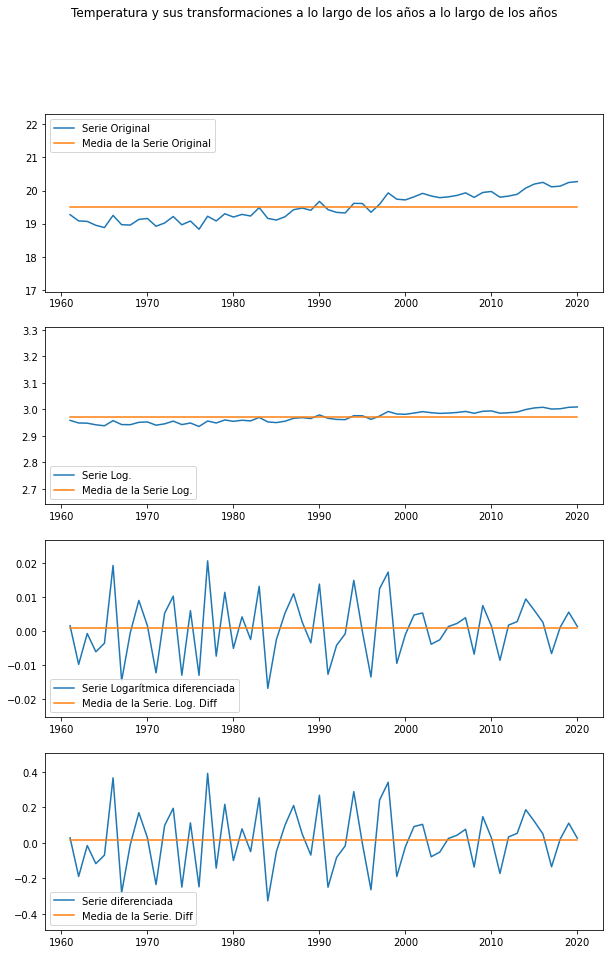

In [9]:
# separar x y la y para el gráfico
x = temp.index

y = temp["mean_temp"]
y_media = [np.mean(y) for _ in y]

y_log = temp["temp_log"]
y_log_media = [np.mean(y_log) for _ in y_log]

y_log_diff = temp["temp_log_diff"]
y_log_diff_mean = [np.mean(y_log_diff) for _ in y_log_diff]

y_diff = temp["temp_diff"]
y_diff_mean = [np.mean(y_diff) for _ in y_diff]

# visualización de los datos anteriores a los largo de los años
fig = plt.figure(figsize = (10, 15))
ax1, ax2, ax3, ax4 = fig.subplots(4, 1)


ax1.plot(x, y, label = "Serie Original")
ax1.plot(x, y_media, label = "Media de la Serie Original")
ax1.set_ylim(np.min(y)*0.9, np.max(y)*1.1)
ax1.legend(loc = "upper left")

ax2.plot(x, y_log, label = "Serie Log.")
ax2.plot(x, y_log_media, label = "Media de la Serie Log.")
ax2.set_ylim(np.min(y_log)*0.9, np.max(y_log)*1.1)
ax2.legend(loc = "lower left")

ax3.plot(x, y_log_diff, label = "Serie Logarítmica diferenciada")
ax3.plot(x, y_log_diff_mean, label = "Media de la Serie. Log. Diff")
ax3.set_ylim(np.min(y_log_diff)*1.5, np.max(y_log_diff)*1.3)
ax3.legend(loc = "lower left")

ax4.plot(x, y_diff, label = "Serie diferenciada")
ax4.plot(x, y_diff_mean, label = "Media de la Serie. Diff")
ax4.set_ylim(np.min(y_diff)*1.5, np.max(y_diff)*1.3)
ax4.legend(loc = "lower left")

fig.suptitle("Temperatura y sus transformaciones a lo largo de los años a lo largo de los años");

In [12]:
for serie, nombre_serie in zip([y, y_log, y_log_diff, y_diff], ["Serie Original", "Serie Log.", "Serie. Log. Diff", "Serie Diff"]):
    
    print("------------------------------------------------------------------")
    
    print("Estamos trabajando con la serie {}\n".format(nombre_serie))
    resultado_analisis = adfuller(serie)
    
    valor_estadistico_adf = resultado_analisis[0]
    p_valor = resultado_analisis[1]
    
    print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
    print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))
    
    print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
    print("p-valor: {}\n".format(p_valor))

------------------------------------------------------------------
Estamos trabajando con la serie Serie Original

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: 0.4987463355566215

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.9848349423352194

------------------------------------------------------------------
Estamos trabajando con la serie Serie Log.

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: 0.4533595358524777

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.9833843927384127

------------------------------------------------------------------
Estamos trabajando con la serie Serie. Log. Diff

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -7.981095443137463

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 2.6221745298750626e-12

--------------------------------------------------

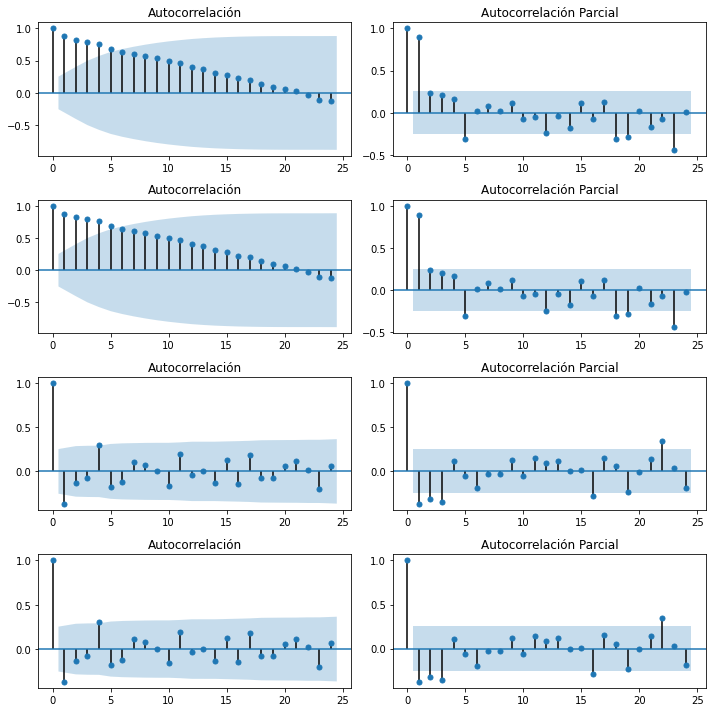

In [13]:
LAGS = 24

fig = plt.figure(figsize = (10, 10))

((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = fig.subplots(4, 2)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module
plot_acf(y, ax = ax1, lags = LAGS, title = "Autocorrelación")
plot_pacf(y, ax = ax2, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log, ax = ax3, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log, ax = ax4, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log_diff, ax = ax5, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log_diff, ax = ax6, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_diff, ax = ax7, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_diff, ax = ax8, lags = LAGS, title = "Autocorrelación Parcial")

fig.tight_layout()

In [14]:
serie_a_predecir = y_diff

In [15]:
y_index = serie_a_predecir.index

date_train = int(len(y_index)*0.9)

y_train = serie_a_predecir[y_index[:date_train]]
y_test = serie_a_predecir[y_index[date_train:len(y_index)]]

We conclude that there is a significant increase in temperature from the year 1990 with respect to the average temperatures between 1960 and 1989.

In [16]:
y_train.tail()

date
2010-01-01    0.029105
2011-01-01   -0.172100
2012-01-01    0.033763
2013-01-01    0.054010
2014-01-01    0.187624
Name: temp_diff, dtype: float64

In [17]:
y_test.head()

date
2015-01-01    0.121401
2016-01-01    0.050477
2017-01-01   -0.134716
2018-01-01    0.020881
2019-01-01    0.111405
Name: temp_diff, dtype: float64

In [18]:
# Para hacer el gridsearch, vamos a calcular los posibles valores que vamos a pasarle al modelo.
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Vamos a utilizar el modelo SARIMAX, porque en su implementaciòn en Python existen herramientas adicionales
# que nos facilitan el análisis y que no están disponibles en la implementación de ARIMA.

# Ahora bien, SARIMAX es un modelo ARIMA pero con un componente estacional (la leta S de Seasonal) y también
# un componente exógeno (X de eXogenous regressors)
# Por tanto un modelo SARIMAX de (1, 1, 1) x (0, 0, 0, 0)
# Es un modelo ARIMA (1, 1, 1)

# En caso de querer probar un modelo SARIMAX completo, ejecutar la siguiente línea de itertools.
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Los dejamos a cero para sólo analizar un modelo ARIMA.
seasonal_pdq = [(0, 0, 0, 0)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 0)
SARIMAX: (0, 1, 0) x (0, 0, 0, 0)


In [19]:
st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))


ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:-30.928279805538708
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:-44.74423853918085
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:-41.026721896700025
ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:22.540266934791347
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:-23.28888720318428
ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:-42.02739705610134
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:81.9836561354382
ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:28.20377792634484
ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:-13.398465216829251
ARIMA(1, 0, 0)x(0, 0, 0, 0)12 - AIC:-37.380184441097136
ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:-42.75743596250046
ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:-39.13917905293669
ARIMA(1, 1, 0)x(0, 0, 0, 0)12 - AIC:1.6225241492413733
ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:-29.4802674827907
ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:-39.92512577837074
ARIMA(1, 2, 0)x(0, 0, 0, 0)12 - AIC:48.31528667220595
ARIMA(1, 2, 1)x(0, 0, 0, 0)12 - AIC:8.86627732762599
ARIMA(1, 2, 2)x(0, 0, 0, 0)12 - AIC:-19.58905334748351
ARIMA(2, 0, 0

In [20]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (2, 2, 1), 
Con un AIC de 0.8837081006290157


In [22]:
# Entrenamos el modelo con los mejores parametros.

mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = (1,0,0),
                                seasonal_order = (0,0,0,0),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

In [23]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3880      0.136     -2.857      0.004      -0.654      -0.122
sigma2         0.0268      0.006      4.573      0.000       0.015       0.038


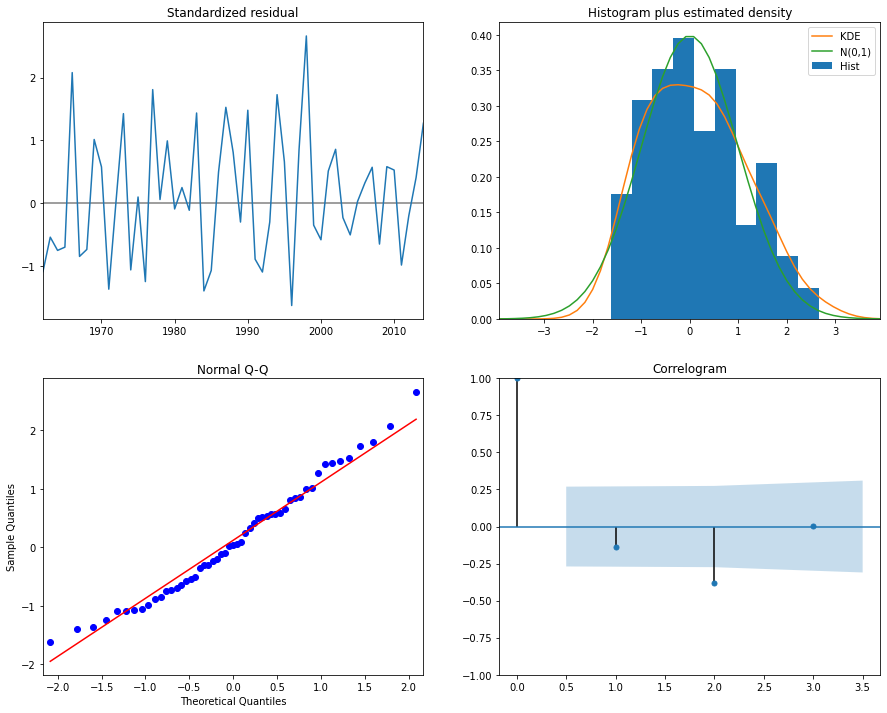

In [24]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);

In [25]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = results.get_forecast(steps = len(y_test))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

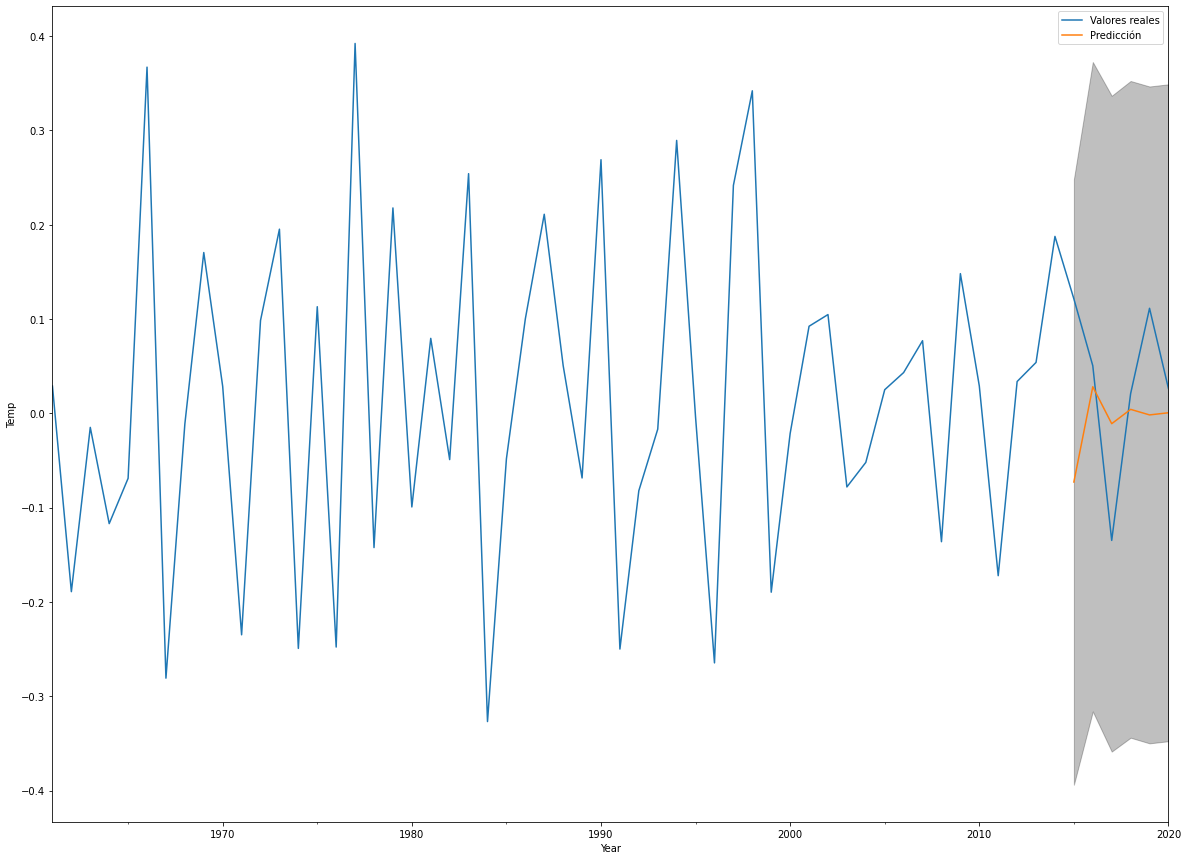

In [26]:
ax = serie_a_predecir.plot(label = 'Valores reales', figsize = (20, 15))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Year')
ax.set_ylabel('Temp')

plt.legend()
plt.show()

In [ ]:
y_pred = pred_ci.iloc[:, 0]

In [ ]:
# El RMSE
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))

print("El modelo ARIMA con los parametros {}, ha dado un rmse en test de {}".format(best_params, round(rmse, 2)))

El modelo ARIMA con los parametros (2, 2, 1), ha dado un rmse en test de 0.44


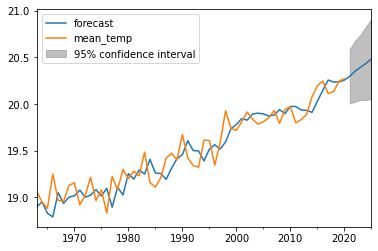

In [28]:
from statsmodels.tsa.arima_model import ARIMA

model_1=ARIMA(temp['mean_temp'],order=(2,2,1))
model_fit1=model_1.fit()
fig=model_fit1.plot_predict(start='1963-01-01', end='2025-01-01')
fig.show()